In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df_titanic = pd.read_csv('train.csv')

In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Question 1
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Question 2.1
df_titanic.size

10692

In [6]:
#Question 2.2
print("Number of passengers : ", df_titanic.shape[0]) 
print("Number of features : ", df_titanic.shape[1])

Number of passengers :  891
Number of features :  12


In [27]:
#Question 3
print(df_titanic.isna().sum())
x = df_titanic["Age"].isna().sum()
y = df_titanic["Cabin"].isna().sum()
z = df_titanic["Embarked"].isna().sum()
print("Age's NaN values number : ", x)
print("Cabin's NaN values number : ", y)
print("Embarked'S NaN values number : ", z)
#There is too many null values in age, cabin and embarked classes.
#Age class has 177 missing values.
#Cabin class has 687 missing values.
#Embarked class has 2 missing values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Age's NaN values number :  177
Cabin's NaN values number :  687
Embarked'S NaN values number :  2


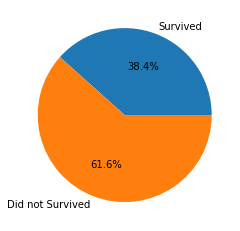

In [8]:
#Question 4 
a = df_titanic["Survived"].isin(["1"]).sum() 
b = df_titanic["Survived"].isin(["0"]).sum()
data = [a,b]
labels = 'Survived', 'Did not Survived'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.show()
#As you can see in pie chart, many people did not survive. 
#Survived people almost half as did not survive people.

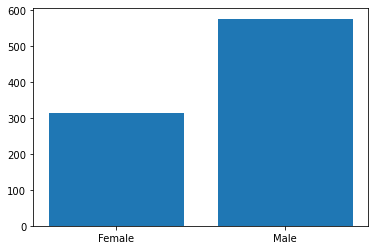

In [9]:
#Question 5 
a = df_titanic["Sex"].isin(["female"]).sum() 
b = df_titanic["Sex"].isin(["male"]).sum()
labels = 'Female', 'Male'
data = [a,b]
plt.bar(labels, data)
plt.show()

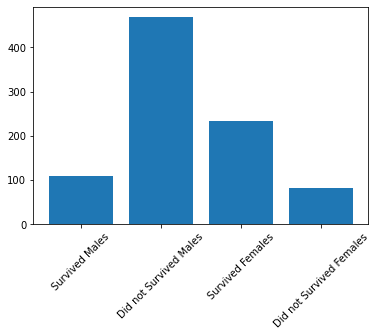

In [10]:
#Question 6
a = len(df_titanic[(df_titanic["Sex"] == "male") & (df_titanic["Survived"] == 1)])
b = len(df_titanic[(df_titanic["Sex"] == "male") & (df_titanic["Survived"] == 0)])
c = len(df_titanic[(df_titanic["Sex"] == "female") & (df_titanic["Survived"] == 1)])
d = len(df_titanic[(df_titanic["Sex"] == "female") & (df_titanic["Survived"] == 0)])
labels = 'Survived Males', 'Did not Survived Males', 'Survived Females', 'Did not Survived Females'
data = [a,b,c,d]
plt.bar(labels,data)
plt.xticks(rotation = 45)
plt.show()

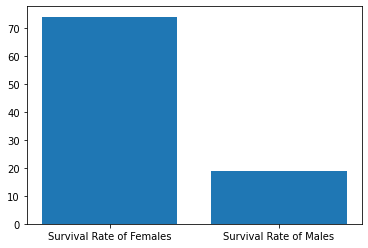

In [11]:
#Question 7
a = len(df_titanic[(df_titanic["Sex"] == "female") & (df_titanic["Survived"] == 1)]) / df_titanic["Sex"].isin(["female"]).sum() * 100 
b = len(df_titanic[(df_titanic["Sex"] == "male") & (df_titanic["Survived"] == 1)]) / df_titanic["Sex"].isin(["male"]).sum() * 100
labels = 'Survival Rate of Females', 'Survival Rate of Males'
data = [a,b]
plt.bar(labels, data)
plt.show()
#We can think there is more female passenger and as you can see female passengers survive further more.
#The reason should be that priority of rescued people is given to woman, children and the elderly. 

In [73]:
#Question 8
first_survival_rate = 136/216
second_survival_rate = 87/184
third_survival_rate = 119/491
x = pd.crosstab(df_titanic["Pclass"], df_titanic["Survived"])
print("The class which has the most number of survivers : " , x.iloc[:, [1]].max())
print("The class which has the lowest number of survivers : " ,  x.iloc[:, [1]].min())
print("First class survival rate : %", first_survival_rate * 100)
print("Second class survival rate : %", second_survival_rate * 100)
print("Third class survival rate : %", third_survival_rate * 100)
print("CROSS TABLE")
pd.crosstab(df_titanic["Pclass"], df_titanic["Survived"], margins=True)


The class which has the most number of survivers :  Survived
1    136
dtype: int64
The class which has the lowest number of survivers :  Survived
1    87
dtype: int64
First class survival rate : % 62.96296296296296
Second class survival rate : % 47.28260869565217
Third class survival rate : % 24.236252545824847
CROSS TABLE


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


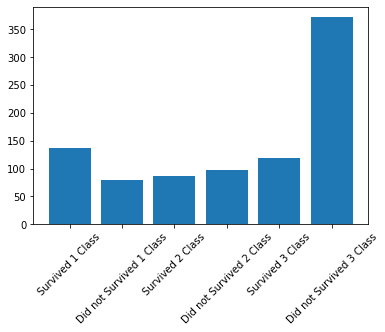

In [13]:
#Question 9
a = len(df_titanic[(df_titanic["Pclass"] == 1) & (df_titanic["Survived"] == 1)])
b = len(df_titanic[(df_titanic["Pclass"] == 1) & (df_titanic["Survived"] == 0)])
c = len(df_titanic[(df_titanic["Pclass"] == 2) & (df_titanic["Survived"] == 1)])
d = len(df_titanic[(df_titanic["Pclass"] == 2) & (df_titanic["Survived"] == 0)])
e = len(df_titanic[(df_titanic["Pclass"] == 3) & (df_titanic["Survived"] == 1)])
f = len(df_titanic[(df_titanic["Pclass"] == 3) & (df_titanic["Survived"] == 0)])
labels = 'Survived 1 Class', 'Did not Survived 1 Class', 'Survived 2 Class', 'Did not Survived 2 Class', 'Survived 3 Class', 'Did not Survived 3 Class'
data = [a,b,c,d,e,f]
plt.bar(labels,data)
plt.xticks(rotation = 45)
plt.show()

In [14]:
#Question 10
pd.crosstab(index=[df_titanic['Sex'],df_titanic['Survived']], columns=df_titanic['Pclass'], margins=True)
#We can see that first class females and second class females almost survived all.
#The reason should be priority of women but all third class females are dead. 
#Maybe, that show us third class females had no chance to survive because of lack of equipment.

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [15]:
#Question 11 
df_titanic["Age"].max()

80.0

In [16]:
#Question 12
df_titanic["Age"].min()

0.42

In [17]:
#Question 13
df_titanic["Age"].mean()

29.69911764705882

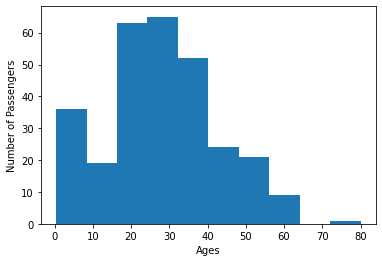

In [75]:
#Question 14 
x = df_titanic[(df_titanic["Survived"] == 1)]["Age"]
plt.hist(x, bins = 10)
plt.xlabel("Ages")
plt.ylabel("Number of Passengers")
plt.show()

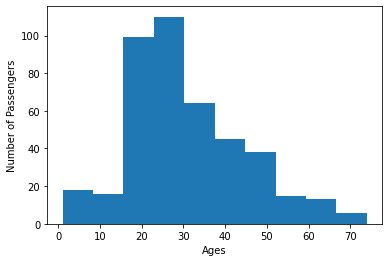

In [19]:
#Question 15
x = df_titanic[(df_titanic["Survived"] == 0)]["Age"]
plt.hist(x, bins = 10)
plt.xlabel("Ages")
plt.ylabel("Number of Passengers")
plt.show()
#Q14 and Q15 explain that young people survival rate is higher than others but middle-aged people almost have %50 survival rate.
#Middle-aged people may have tried to save others.

In [20]:
#Question 16
df_titanic["Fare"].min()

0.0

In [21]:
#Question 17
df_titanic["Fare"].max()

512.3292

In [22]:
#Question 18
df_titanic["Fare"].mean()

32.2042079685746

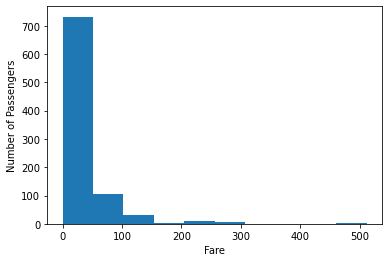

In [23]:
#Question 19
x = df_titanic["Fare"]
plt.hist(x, bins = 10)
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.show()

In [76]:
#Question 20
df_titanic[(df_titanic["Age"] < 10) & (df_titanic["Parch"] == 0)]
#It seems that there is only one child who meets these conditions. 
#She is too young to board the ship. Maybe his uncle or a relative on the ship.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.475,NaN,S
